In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Create universe variables
    # Input
population_density = ctrl.Antecedent(np.arange(0, 20001, 1), 'population_density')
air_pollution = ctrl.Antecedent(np.arange(0, 151, 1), 'air_pollution')
veg_cover = ctrl.Antecedent(np.arange(0, 101, 1), 'veg_cover')
    # Output
need_for_action = ctrl.Consequent(np.arange(0, 101, 1), 'need_for_action')

C:\Users\mapiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Text(0.5, 0, 'Population Density (people/km²)')

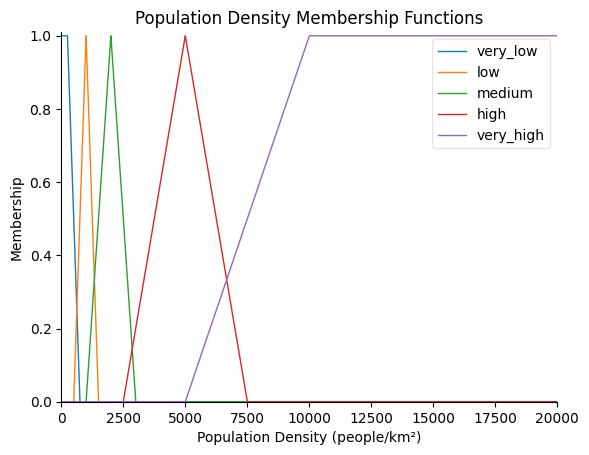

In [2]:
# Define membership functions for population density
population_density['very_low'] = fuzz.trapmf(population_density.universe, [0, 0, 250, 750])
population_density['low'] = fuzz.trimf(population_density.universe, [500, 1000, 1500])
population_density['medium'] = fuzz.trimf(population_density.universe, [1000, 2000, 3000])
population_density['high'] = fuzz.trimf(population_density.universe, [2500, 5000, 7500])
population_density['very_high'] = fuzz.trapmf(population_density.universe, [5000, 10000, 20000, 20000])

# Population Density Membership Functions
population_density.view()
plt.title('Population Density Membership Functions')
plt.xlabel('Population Density (people/km²)')

Text(0.5, 0, 'Air pollution (µg/m³)')

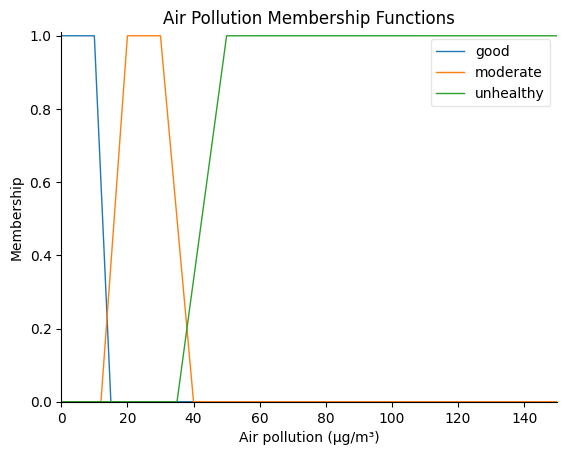

In [3]:
# Define membership functions for air pollution
air_pollution['good'] = fuzz.trapmf(air_pollution.universe, [0, 0, 10, 15])
air_pollution['moderate'] = fuzz.trapmf(air_pollution.universe, [12, 20, 30, 40])
air_pollution['unhealthy'] = fuzz.trapmf(air_pollution.universe, [35, 50, 150, 150])

# Air Pollution Membership Functions
air_pollution.view()
plt.title('Air Pollution Membership Functions')
plt.xlabel('Air pollution (µg/m³)')

Text(0.5, 0, 'Vegetation cover (%)')

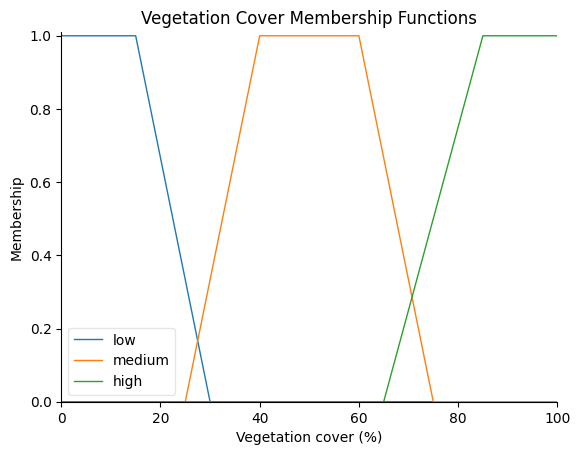

In [4]:
# Define membership functions for vegetation cover
veg_cover['low'] = fuzz.trapmf(veg_cover.universe, [0, 0, 15, 30])
veg_cover['medium'] = fuzz.trapmf(veg_cover.universe, [25, 40, 60, 75])
veg_cover['high'] = fuzz.trapmf(veg_cover.universe, [65, 85, 100, 100])

# Vegetation Cover Membership Functions
veg_cover.view()
plt.title('Vegetation Cover Membership Functions')
plt.xlabel('Vegetation cover (%)')

Text(0.5, 0, 'Need for action(%)')

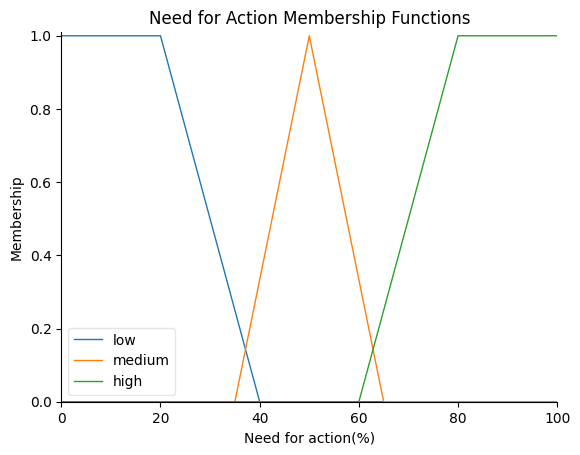

In [5]:
# Define membership functions for need for action
need_for_action['low'] = fuzz.trapmf(need_for_action.universe, [0, 0, 20, 40])
need_for_action['medium'] = fuzz.trimf(need_for_action.universe, [35, 50, 65])
need_for_action['high'] = fuzz.trapmf(need_for_action.universe, [60, 80, 100, 100])

# Need for Action Membership Functions
need_for_action.view()
plt.title('Need for Action Membership Functions')
plt.xlabel('Need for action(%)')

In [ ]:
# Simplified rules
rule1 = ctrl.Rule(
    air_pollution['unhealthy'] & population_density['very_high'],
    need_for_action['high']
)

rule2 = ctrl.Rule(
    air_pollution['unhealthy'] &population_density['very_low'],
    need_for_action['low']
)

rule3 = ctrl.Rule(
    air_pollution['good'],
    need_for_action['low']
)

rule4 = ctrl.Rule(
    veg_cover['high'],
    need_for_action['low']
)

rule5 = ctrl.Rule(
    air_pollution['moderate'],
    need_for_action['medium']
)
# Create control system
ctrl_sys = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5 
])

In [12]:
# Initiate simulation
sim = ctrl.ControlSystemSimulation(ctrl_sys)

# Run simulation, given input values
def run(sim, veg_cover, air_pollution, population_density):
    sim.input['veg_cover'] = veg_cover                      # Vegetation Cover (%)
    sim.input['air_pollution'] = air_pollution              # µg/m³
    sim.input['population_density'] = population_density    # people/km² (Very High)
    sim.compute()
    return sim.output['need_for_action']

# Output
score = run(sim, veg_cover=25, air_pollution=25, population_density=15000)
print(f'"Need for Action" score: {score:.2f}%')

"Need for Action" score: 50.00%


In [ ]:
# Interpret need for action level
if score <= 40:
    na_level = "Low Need"
elif 40 < score <= 70:
    na_level = "Moderate Need"
else:
    na_level = "High Need"

print("""
Input values
------------
""")
for var, val in zip(sim._get_inputs().keys(), sim._get_inputs().values()):
    print(f"{var} = {val}")
print("""
-------------
""")

print(f"Need for Green Infrastructure Action: {na_level} ({score:.0f}%)")

# Provide recommendations based on the need for action level
print("\nRecommendations:")
if na_level == "High Need":
    print("- Increase vegetation cover.")
    print("- Implement green roofs and walls.")
    print("- Use reflective surface materials.")
    print("- Reduce emissions from traffic and industry.")
elif na_level == "Moderate Need":
    print("- Enhance existing green spaces.")
    print("- Promote sustainable practices.")
    print("- Monitor air quality.")
else:
    print("- Maintain current practices.")
    print("- Engage the community in sustainability efforts.")


Input values
------------

air_pollution = 55
population_density = 15000
veg_cover = 25

-------------

Need for Green Infrastructure Action: High Need (84%)

Recommendations:
- Increase vegetation cover.
- Implement green roofs and walls.
- Use reflective surface materials.
- Reduce emissions from traffic and industry.


Text(0.5, 0, 'Need for Action (%)')

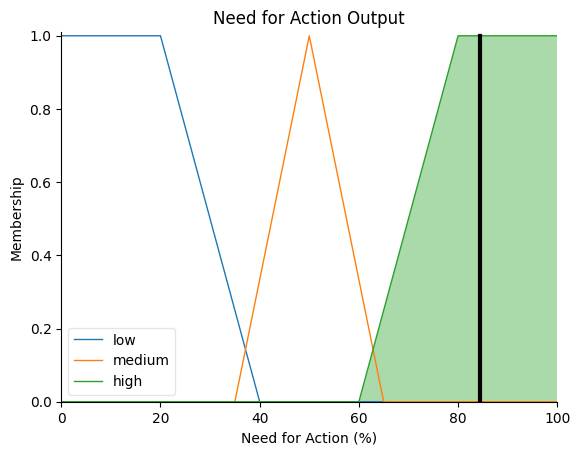

In [ ]:
need_for_action.view(sim=sim)
plt.title('Need for Action Output')
plt.xlabel('Need for Action (%)')